<a href="https://colab.research.google.com/github/Bordin-Lab/election-pelotas/blob/main/Teste_de_Kolmogorov_Smirnov_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Realize um teste de Kolmogorov-Smirnov nos dados de votos contidos no arquivo "/content/Eleição 2020 - Teste de Kolmogorov-Smirnov.xlsx".

## Carregar os dados

### Subtask:
Carregar os dados da planilha Excel em um DataFrame pandas.


**Reasoning**:
Import pandas and load the Excel file into a DataFrame, then display the head to verify the loading.



In [ ]:
import pandas as pd

df = pd.read_excel('/content/Eleição 2020 - Teste de Kolmogorov-Smirnov.xlsx')
display(df.head())

,Número de votos
0,4899
1,3645
2,3422
3,2736
4,2626


## Preparar os dados

### Subtask:
Extrair a coluna com os números de votos que serão usados para o teste.


**Reasoning**:
Extract the 'Número de votos' column and convert it to a numeric format to prepare for the Kolmogorov-Smirnov test.



In [ ]:
dados_votos = pd.to_numeric(df['Número de votos '])
display(dados_votos.head())

,Número de votos
0,4899
1,3645
2,3422
3,2736
4,2626


## Realizar o teste de kolmogorov-smirnov

### Subtask:
Aplicar a função `kstest` da biblioteca `scipy.stats` para realizar o teste. Será necessário escolher uma distribuição teórica para comparar com os dados (por exemplo, normal, uniforme, etc.).


**Reasoning**:
Apply the kstest function to the data using the normal distribution as the theoretical distribution.



In [ ]:
from scipy.stats import kstest

ks_statistic, p_value = kstest(dados_votos, 'norm')
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

KS Statistic: 0.9210030431448405
P-value: 0.0


## Interpretar os resultados

### Subtask:
Interpretar o valor p retornado pelo teste para determinar se a distribuição dos votos é significativamente diferente da distribuição teórica escolhida.


**Reasoning**:
Based on the previous step, the p-value is 0.0. This value needs to be compared with a significance level (alpha), typically 0.05, to interpret the result of the Kolmogorov-Smirnov test. A p-value less than alpha indicates that we reject the null hypothesis.



In [ ]:
alpha = 0.05

if p_value < alpha:
    conclusion = "O valor p ({}) é menor que o nível de significância ({}). Portanto, rejeitamos a hipótese nula. Há evidências estatísticas suficientes para concluir que a distribuição dos votos é significativamente diferente da distribuição teórica escolhida (normal).".format(p_value, alpha)
else:
    conclusion = "O valor p ({}) é maior ou igual ao nível de significância ({}). Portanto, não rejeitamos a hipótese nula. Não há evidências estatísticas suficientes para concluir que a distribuição dos votos é significativamente diferente da distribuição teórica escolhida (normal).".format(p_value, alpha)

print(conclusion)

O valor p (0.0) é menor que o nível de significância (0.05). Portanto, rejeitamos a hipótese nula. Há evidências estatísticas suficientes para concluir que a distribuição dos votos é significativamente diferente da distribuição teórica escolhida (normal).


## Visualizar os dados e a distribuição teórica (opcional)

### Subtask:
Criar um histograma dos dados de voto e sobrepor a função de densidade de probabilidade (PDF) da distribuição teórica escolhida para visualização.


**Reasoning**:
Create a histogram of the vote data and overlay the PDF of the theoretical normal distribution for visualization.



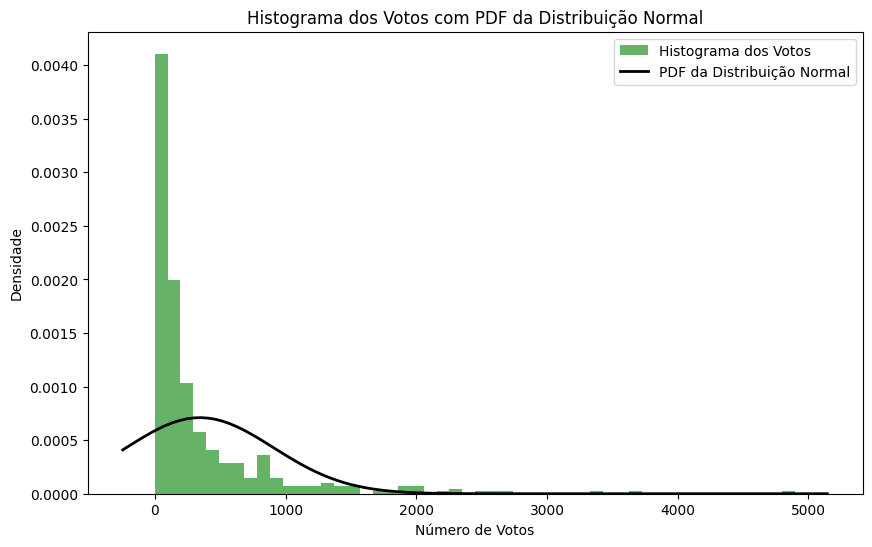

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

plt.figure(figsize=(10, 6))
plt.hist(dados_votos, bins=50, density=True, alpha=0.6, color='g', label='Histograma dos Votos')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = dados_votos.mean(), dados_votos.std()
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='PDF da Distribuição Normal')

plt.title('Histograma dos Votos com PDF da Distribuição Normal')
plt.xlabel('Número de Votos')
plt.ylabel('Densidade')
plt.legend()
plt.show()

## Summary:

### Q&A
**P: A distribuição de votos segue uma distribuição normal?**

R: Não, o teste de Kolmogorov-Smirnov resultou em um valor-p de 0.0, que é menor que o nível de significância de 0.05. Isso indica que a distribuição dos votos é significativamente diferente de uma distribuição normal.

### Data Analysis Key Findings
* O teste de Kolmogorov-Smirnov foi aplicado aos dados de votos para comparar sua distribuição com uma distribuição normal teórica.
* O teste produziu uma estatística KS de aproximadamente 0.921 e um valor-p de 0.0.
* Como o valor-p (0.0) é menor que o nível de significância (0.05), a hipótese nula de que os dados seguem uma distribuição normal foi rejeitada.
* A visualização do histograma dos dados de votos em comparação com a curva de densidade de probabilidade da distribuição normal confirma visualmente essa diferença significativa.

### Insights or Next Steps
* A distribuição dos votos não é normal, o que pode ter implicações para análises estatísticas que assumem normalidade.
* Seria interessante investigar outras distribuições teóricas (por exemplo, log-normal, Poisson) para ver se elas se ajustam melhor aos dados de votos.


## Visualizar ECDF e CDF Teórica

### Subtask:
Criar um gráfico que compara a Função de Distribuição Cumulativa Empírica (ECDF) dos dados de voto com a Função de Distribuição Cumulativa (CDF) da distribuição teórica escolhida (normal).

**Reasoning**:
To visualize the ECDF and theoretical CDF, we will use `statsmodels` for the ECDF and `scipy.stats.norm` for the normal CDF. We will plot both on the same axes for comparison.

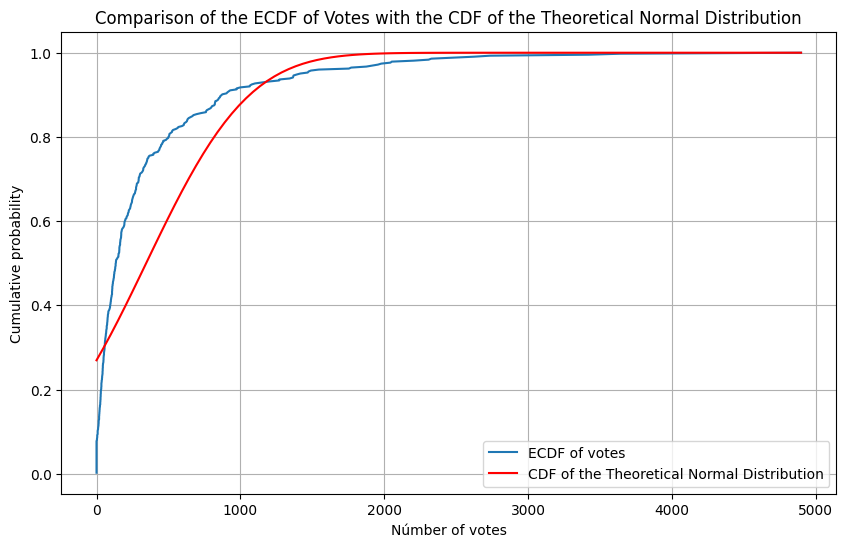

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF

# Create ECDF of the data
ecdf = ECDF(dados_votos)

# Create CDF of the theoretical normal distribution
# Use the mean and standard deviation calculated from the data
mu, std = dados_votos.mean(), dados_votos.std()
x_theoretical = np.linspace(min(dados_votos), max(dados_votos), 100)
cdf_theoretical = norm.cdf(x_theoretical, mu, std)

# Plot ECDF and theoretical CDF
plt.figure(figsize=(10, 6))
plt.plot(ecdf.x, ecdf.y, label='ECDF of votes')
plt.plot(x_theoretical, cdf_theoretical, 'r-', label='CDF of the Theoretical Normal Distribution')

plt.title('Comparison of the ECDF of Votes with the CDF of the Theoretical Normal Distribution')
plt.xlabel('Númber of votes')
plt.ylabel('Cumulative probability')
plt.legend()
plt.grid(True)
plt.show()

###

Criando um teste de Kolmogorov-Smirnov a partir dos números de votos

Carregar os dados: Carregar os dados da planilha Excel em um DataFrame pandas.
Preparar os dados: Extrair a coluna com os números de votos que serão usados para o teste.
Realizar o teste de kolmogorov-smirnov: Aplicar a função kstest da biblioteca scipy.stats para realizar o teste. Será necessário escolher uma distribuição teórica para comparar com os dados (por exemplo, normal, uniforme, etc.).
Interpretar os resultados: Analisar o valor p retornado pelo teste para determinar se a distribuição dos votos é significativamente diferente da distribuição teórica escolhida.
Visualizar os dados e a distribuição teórica (opcional): Criar um histograma dos dados de voto e sobrepor a função de densidade de probabilidade (PDF) da distribuição teórica escolhida para visualização.
Finalizar a tarefa: Apresentar os resultados do teste e a interpretação de forma clara.
Gerando…
Preparing
Carregar os dados
Preparar os dados
Realizar o teste de kolmogorov-smirnov
Interpretar os resultados
Visualizar os dados e a distribuição teórica (opcional)
Finalizar a tarefa

Criando um gráfico com a a Função de Distribuição Comparativa Empírica (ECDF) da amostra com a Função de distribuição Cumulativa (CDF) da distribuição teórica para números de votos
.

O gráfico comparando a ECDF dos votos com a CDF da distribuição normal teórica foi gerado com sucesso. Agora, para finalizar a tarefa, podemos apresentar um resumo dos resultados e as conclusões do teste de Kolmogorov-Smirnov.

Interpretando as estatísticas referentes ao teste de hipóteses nula e a alternativa descrevendo porque a nula foi rejeitada.


No teste de Kolmogorov-Smirnov, as hipóteses são as seguintes:

Hipótese Nula (H₀): A distribuição dos dados de voto é a mesma que a distribuição teórica escolhida (neste caso, a distribuição normal).
Hipótese Alternativa (H₁): A distribuição dos dados de voto é diferente da distribuição teórica escolhida (a distribuição normal).
O teste calcula uma estatística KS que mede a maior diferença absoluta entre a Função de Distribuição Cumulativa Empírica (ECDF) dos seus dados e a Função de Distribuição Cumulativa (CDF) da distribuição teórica.

Junto com a estatística KS, o teste retorna um valor-p. O valor-p é a probabilidade de observar uma estatística KS tão extrema (ou mais extrema) quanto a calculada, assumindo que a hipótese nula seja verdadeira.

No seu caso, o teste resultou em um valor-p de 0.0.

Para decidir se rejeitamos a hipótese nula, comparamos o valor-p com um nível de significância (α), que geralmente é definido como 0.05.

Se o valor-p < α: Rejeitamos a hipótese nula. Isso significa que há evidências estatísticas suficientes para concluir que a distribuição dos dados é significativamente diferente da distribuição teórica.
Se o valor-p ≥ α: Não rejeitamos a hipótese nula. Isso significa que não há evidências estatísticas suficientes para concluir que a distribuição dos dados é significativamente diferente da distribuição teórica.
Como o seu valor-p (0.0) é menor que o nível de significância (0.05), você rejeitou a hipótese nula.

Em termos práticos, isso significa que a diferença observada entre a distribuição dos seus dados de voto e a distribuição normal teórica não é provável de ter ocorrido apenas por acaso, se os dados realmente seguissem uma distribuição normal. Portanto, concluímos que a distribuição dos seus dados de voto é significativamente diferente de uma distribuição normal